### Programming for Data Analysis Project 1

### Introduction  

For this project we chose Quality of Life dataset by O.Karaman retreived from Kaggle platform.[[1]](https://www.kaggle.com/datasets/orhankaramancode/city-quality-of-life-dataset) Data were acquired from Teleport.org and contain scores on different variables about the life in the cities around the world allowing the users to compare them in order to ease the decision of choosing a place to live. [[2]](https://teleport.org/about-us/)    

To simplify the analysis, we will not be using the entire dataset, instead we are going to pick some of the variables we find the most interesting and explore the relationship between them. (add more here)

### Exploring Data

Even though data were already pre-processed, since we are not going to use the whole dataset, we will do additional cleaning but first, we are going to take a look at data as we retrieved them. They are uploaded in csv format as scoresData.csv.

In [1]:
# Importing libraries we are going to use:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
scores = pd.read_csv('scoresData.csv')

To see the first couple of rows we are using the head() function.   
We have 21 columns of which the first one shows indexes of rows, next three are Name (of the cities), Country and Continent for which the scores in the variables are shown.  


In [4]:
scores.head()

,Unnamed: 0,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


Types of data in the dataframe are checked with the info() function. Scores for variables such as Housing, Cost of Living, Startups and the rest are float data type while categorial variables: Name (of the city), Country and Continent have object data types.  
According to the output none of the entries are null, there are no missing values, although, just by looking at data we can see zeroes are included. Since we are not going to use the entire dataset, we will deal with zeroes later, after we pick the variables for analysis.  


In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             266 non-null    int64  
 1   UA_Name                266 non-null    object 
 2   UA_Country             266 non-null    object 
 3   UA_Continent           266 non-null    object 
 4   Housing                266 non-null    float64
 5   Cost of Living         266 non-null    float64
 6   Startups               266 non-null    float64
 7   Venture Capital        266 non-null    float64
 8   Travel Connectivity    266 non-null    float64
 9   Commute                266 non-null    float64
 10  Business Freedom       266 non-null    float64
 11  Safety                 266 non-null    float64
 12  Healthcare             266 non-null    float64
 13  Education              266 non-null    float64
 14  Environmental Quality  266 non-null    float64
 15  Econom

### Data Cleaning

After exploring the ways of how to remove columns we don't want in a dataset, it was decided we are going to drop them by indexes.

In [6]:
# axis=1 because we are taking out columns, for rows would be axis=0
scores = scores.drop(scores.columns[[0, 4, 6, 7, 8, 9, 12, 16, 14, 17, 18, 20]], axis=1)
scores

,UA_Name,UA_Country,UA_Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
0,Aarhus,Denmark,Europe,4.015,9.940000,9.6165,5.3665,4.8865,9.7385
1,Adelaide,Australia,Oceania,4.692,9.399667,7.9260,5.1420,6.0695,7.8220
2,Albuquerque,New Mexico,North America,6.059,8.671000,1.3435,4.1520,6.5145,7.0285
3,Almaty,Kazakhstan,Asia,9.333,5.568000,7.3090,2.2830,5.2690,6.5395
4,Amsterdam,Netherlands,Europe,3.824,8.836667,8.5035,6.1800,5.0530,8.3680
...,...,...,...,...,...,...,...,...,...
261,Winnipeg,Canada,North America,5.882,8.966000,6.0155,5.3440,5.8405,6.6590
262,Wroclaw,Poland,Europe,8.434,5.704333,8.1655,4.1615,4.7615,3.9045
263,Yerevan,Armenia,Asia,9.431,6.501000,8.8730,0.0000,3.4580,7.3465
264,Zagreb,Croatia,Europe,7.194,5.720333,8.6575,3.2110,2.2365,7.9545


To make a dataframe look nicer we changed the names of the variables

In [7]:
scores = scores.rename(columns={"UA_Name": "City", "UA_Country": "Country", "UA_Continent": "Continent"})
scores

,City,Country,Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
0,Aarhus,Denmark,Europe,4.015,9.940000,9.6165,5.3665,4.8865,9.7385
1,Adelaide,Australia,Oceania,4.692,9.399667,7.9260,5.1420,6.0695,7.8220
2,Albuquerque,New Mexico,North America,6.059,8.671000,1.3435,4.1520,6.5145,7.0285
3,Almaty,Kazakhstan,Asia,9.333,5.568000,7.3090,2.2830,5.2690,6.5395
4,Amsterdam,Netherlands,Europe,3.824,8.836667,8.5035,6.1800,5.0530,8.3680
...,...,...,...,...,...,...,...,...,...
261,Winnipeg,Canada,North America,5.882,8.966000,6.0155,5.3440,5.8405,6.6590
262,Wroclaw,Poland,Europe,8.434,5.704333,8.1655,4.1615,4.7615,3.9045
263,Yerevan,Armenia,Asia,9.431,6.501000,8.8730,0.0000,3.4580,7.3465
264,Zagreb,Croatia,Europe,7.194,5.720333,8.6575,3.2110,2.2365,7.9545


Next, we checked for zeroes in columns containing scores. Index slicing was used to remove zeroe values. [[3]](https://www.youtube.com/watch?v=i4cI4y9cLzg)

In [8]:
scores.columns[3:]

Index(['Cost of Living', 'Business Freedom', 'Safety', 'Education', 'Economy',
       'Tolerance'],
      dtype='object')

In [9]:
scores[(scores[scores.columns[3:]]==0).any(axis=1)]

,City,Country,Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
6,Andorra,Andorra,Europe,0.000,0.000000,9.5535,0.0000,0.0000,8.7035
9,Asuncion,Paraguay,South America,9.295,3.684000,6.9345,0.0000,4.1090,7.0515
14,Baku,Azerbaijan,Asia,9.806,5.671667,8.7720,0.0000,3.8765,6.5845
15,Bali,Indonesia,Asia,0.000,3.912333,8.7475,0.5275,4.6575,4.5590
23,Belize City,Belize,North America,0.000,3.411000,6.0520,0.0000,3.4960,6.8650
37,Bozeman,Montana,North America,0.000,8.671000,6.9145,4.1280,6.5145,7.2935
52,Caracas,Venezuela,South America,9.820,1.000000,5.2210,0.0000,1.9780,4.5505
54,Casablanca,Morocco,Africa,9.088,5.614333,6.7755,0.0000,3.1735,2.9450
73,Dar es Salaam,Tanzania,Africa,8.026,3.288667,6.1005,0.0000,5.5000,2.7665
89,Fort Collins,Colorado,North America,0.000,8.671000,6.9355,4.1735,6.5145,9.4800


After removing zero values, our new dataset contains 240 rows over 8 columns.

In [10]:
scores = scores[~(scores[scores.columns[3:]]==0).any(axis=1)]
scores

,City,Country,Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
0,Aarhus,Denmark,Europe,4.015,9.940000,9.6165,5.3665,4.8865,9.7385
1,Adelaide,Australia,Oceania,4.692,9.399667,7.9260,5.1420,6.0695,7.8220
2,Albuquerque,New Mexico,North America,6.059,8.671000,1.3435,4.1520,6.5145,7.0285
3,Almaty,Kazakhstan,Asia,9.333,5.568000,7.3090,2.2830,5.2690,6.5395
4,Amsterdam,Netherlands,Europe,3.824,8.836667,8.5035,6.1800,5.0530,8.3680
...,...,...,...,...,...,...,...,...,...
260,Wellington,New Zealand,Oceania,5.161,10.000000,8.2230,4.7560,5.5055,8.1160
261,Winnipeg,Canada,North America,5.882,8.966000,6.0155,5.3440,5.8405,6.6590
262,Wroclaw,Poland,Europe,8.434,5.704333,8.1655,4.1615,4.7615,3.9045
264,Zagreb,Croatia,Europe,7.194,5.720333,8.6575,3.2110,2.2365,7.9545


We are going to take first 150 data to run the testing.

In [11]:
# These are data we are going to take out and keep in a different dataset
scorescontrol = scores.iloc[200:]
scorescontrol.to_csv('scorescontrol.csv')

In [12]:
scores = scores.iloc[:200]
scores

,City,Country,Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
0,Aarhus,Denmark,Europe,4.015,9.940000,9.6165,5.3665,4.8865,9.7385
1,Adelaide,Australia,Oceania,4.692,9.399667,7.9260,5.1420,6.0695,7.8220
2,Albuquerque,New Mexico,North America,6.059,8.671000,1.3435,4.1520,6.5145,7.0285
3,Almaty,Kazakhstan,Asia,9.333,5.568000,7.3090,2.2830,5.2690,6.5395
4,Amsterdam,Netherlands,Europe,3.824,8.836667,8.5035,6.1800,5.0530,8.3680
...,...,...,...,...,...,...,...,...,...
229,St. Louis,Missouri,North America,5.504,8.671000,3.8805,5.2715,6.5145,4.3760
230,Stockholm,Sweden,Europe,4.360,9.569000,6.8865,6.6675,5.6945,5.7195
231,Stuttgart,Germany,Europe,5.673,9.072333,8.2695,5.0505,5.3735,7.5335
232,Sydney,Australia,Oceania,4.128,9.399667,7.5710,6.7255,6.0695,7.0325


To get all scores with the same number of decimals we used round function.

In [13]:
scores.round(decimals=4)

,City,Country,Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
0,Aarhus,Denmark,Europe,4.015,9.9400,9.6165,5.3665,4.8865,9.7385
1,Adelaide,Australia,Oceania,4.692,9.3997,7.9260,5.1420,6.0695,7.8220
2,Albuquerque,New Mexico,North America,6.059,8.6710,1.3435,4.1520,6.5145,7.0285
3,Almaty,Kazakhstan,Asia,9.333,5.5680,7.3090,2.2830,5.2690,6.5395
4,Amsterdam,Netherlands,Europe,3.824,8.8367,8.5035,6.1800,5.0530,8.3680
...,...,...,...,...,...,...,...,...,...
229,St. Louis,Missouri,North America,5.504,8.6710,3.8805,5.2715,6.5145,4.3760
230,Stockholm,Sweden,Europe,4.360,9.5690,6.8865,6.6675,5.6945,5.7195
231,Stuttgart,Germany,Europe,5.673,9.0723,8.2695,5.0505,5.3735,7.5335
232,Sydney,Australia,Oceania,4.128,9.3997,7.5710,6.7255,6.0695,7.0325


In [14]:
scores.to_csv('scorestest.csv', index=False)

### Statistics

Group cities by continents

In [15]:
scores['Continent'].value_counts()

Europe           87
North America    67
Asia             24
South America    11
Oceania           7
Africa            4
Name: Continent, dtype: int64

Descriptive statistics 

In [16]:
scores.describe()

,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.962835,7.687105,6.748665,4.209138,5.293908,6.778008
std,1.863146,1.778135,1.776871,1.950519,1.408664,1.682179
min,1.000000,2.781000,1.343500,0.500000,1.275500,1.528000
25%,4.932250,6.206917,5.651875,3.624500,4.273125,5.782625
50%,5.641000,8.671000,7.089000,4.306500,5.438000,7.091000
75%,7.260000,8.888000,7.929500,5.302375,6.514500,8.000125
max,10.000000,10.000000,10.000000,9.711000,9.390000,9.738500


In [17]:
#do histograms nicer

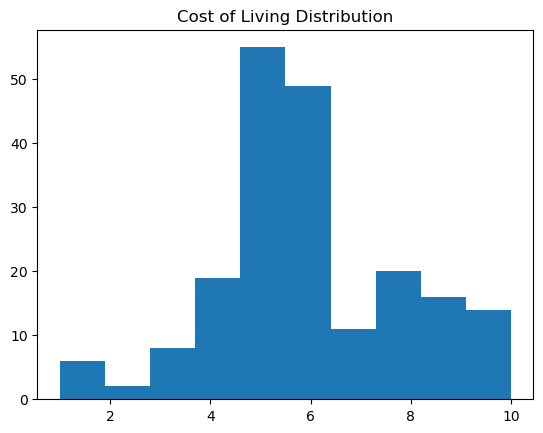

In [18]:
plt.hist(scores['Cost of Living'])
plt.title(label='Cost of Living Distribution')
plt.savefig('CoL_distribution')
plt.show()

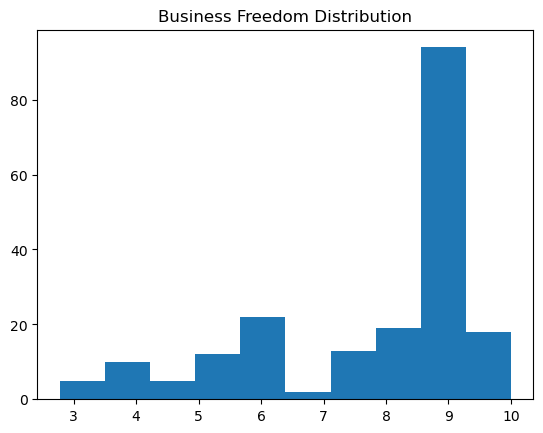

In [19]:
plt.hist(scores['Business Freedom'])
plt.title(label='Business Freedom Distribution')
plt.savefig('BF_distribution')
plt.show()

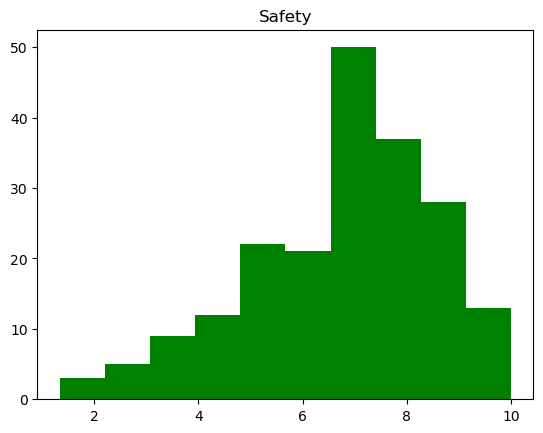

In [20]:
plt.hist(scores['Safety'], color='green')
plt.title(label='Safety')
plt.savefig('Safety_distribution')
plt.show()

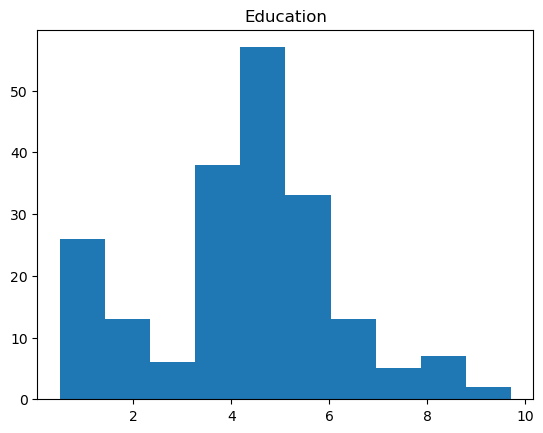

In [21]:
plt.hist(scores['Education'])
plt.title(label='Education')
plt.savefig('Education_distribution')
plt.show()

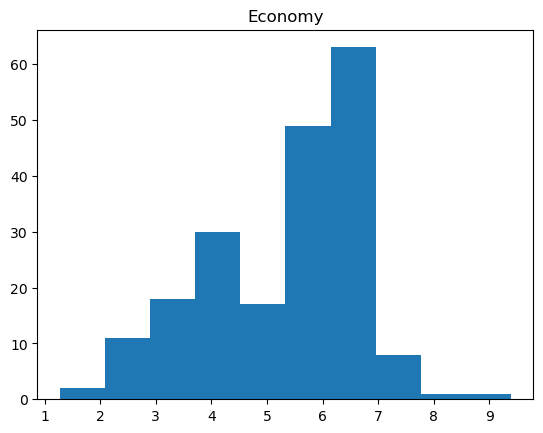

In [22]:
plt.hist(scores['Economy'])
plt.title(label='Economy')
plt.savefig('Economy_distribution')
plt.show()

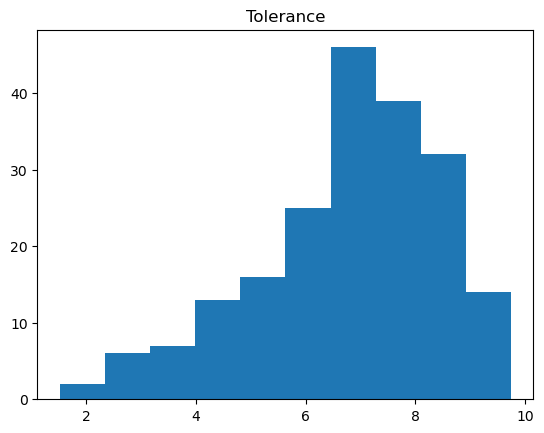

In [23]:
plt.hist(scores['Tolerance'])
plt.title(label='Tolerance')
plt.savefig('Tolerance_distribution')
plt.show()

In [24]:
correlation = scores.corr()
correlation

,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance
Cost of Living,1.000000,-0.742662,-0.011178,-0.683704,-0.509653,-0.354130
Business Freedom,-0.742662,1.000000,-0.021388,0.681713,0.618213,0.371194
Safety,-0.011178,-0.021388,1.000000,0.108789,-0.216606,0.383798
Education,-0.683704,0.681713,0.108789,1.000000,0.475641,0.258807
Economy,-0.509653,0.618213,-0.216606,0.475641,1.000000,-0.014757
Tolerance,-0.354130,0.371194,0.383798,0.258807,-0.014757,1.000000


Random generator

In [27]:
#returns floating point number between 0 and 1
#rng = np.random.default_rng()
#rng.random()

0.6405958546761882

In [ ]:
scores

In [52]:
newVar = rng.normal(5.962835, 1.863146, size=200)
newVar

array([ 7.35754755,  7.15439755, 10.96366655,  8.66395676,  6.77616643,
        7.46293267,  3.11500642,  6.87646045,  6.69978081,  8.52603813,
        5.73699006,  5.36095897,  3.77823274,  4.12525724,  4.79838972,
        9.23633823,  2.07103627,  4.06170199,  3.52704443,  6.7867768 ,
        4.93343257,  5.52207839,  6.49861469,  7.46695   ,  6.01843735,
        7.83422855,  8.35885338,  5.58298949,  5.31733092,  7.13539989,
        3.55057531,  7.46445283,  4.11690379,  5.18553107,  4.16723338,
        4.80933026,  8.2527036 ,  5.59857777,  7.44382537,  4.11634823,
        9.38329633,  7.03051784,  6.0885148 ,  8.70739165,  5.25516062,
        4.29485517,  2.41109204,  5.60948167,  5.67763959,  7.00395266,
        3.73948029,  5.54446352,  6.28680286,  5.87909148,  5.71934427,
        7.81995977,  8.43886014,  8.41455927,  5.46370648,  5.96560858,
        5.40694283,  7.53026905,  6.3423803 ,  8.01378244,  3.72007451,
        4.99252915,  6.5356342 ,  9.38891237,  6.20596679,  6.42

In [55]:
scores.insert(10, 'CostOfL2', newVar, True)
scores

,City,Country,Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance,newCostOfLiving,CostOfL2,CostOfL2
0,Aarhus,Denmark,Europe,4.015,9.940000,9.6165,5.3665,4.8865,9.7385,5.808487,7.357548,7.271249
1,Adelaide,Australia,Oceania,4.692,9.399667,7.9260,5.1420,6.0695,7.8220,9.146077,7.154398,3.638126
2,Albuquerque,New Mexico,North America,6.059,8.671000,1.3435,4.1520,6.5145,7.0285,5.592466,10.963667,6.866807
3,Almaty,Kazakhstan,Asia,9.333,5.568000,7.3090,2.2830,5.2690,6.5395,6.107137,8.663957,11.786869
4,Amsterdam,Netherlands,Europe,3.824,8.836667,8.5035,6.1800,5.0530,8.3680,6.558976,6.776166,6.508470
...,...,...,...,...,...,...,...,...,...,...,...,...
229,St. Louis,Missouri,North America,5.504,8.671000,3.8805,5.2715,6.5145,4.3760,5.042044,5.528263,6.111649
230,Stockholm,Sweden,Europe,4.360,9.569000,6.8865,6.6675,5.6945,5.7195,2.593807,6.774233,4.542092
231,Stuttgart,Germany,Europe,5.673,9.072333,8.2695,5.0505,5.3735,7.5335,4.840236,6.007508,5.213687
232,Sydney,Australia,Oceania,4.128,9.399667,7.5710,6.7255,6.0695,7.0325,2.992173,5.478982,5.543582


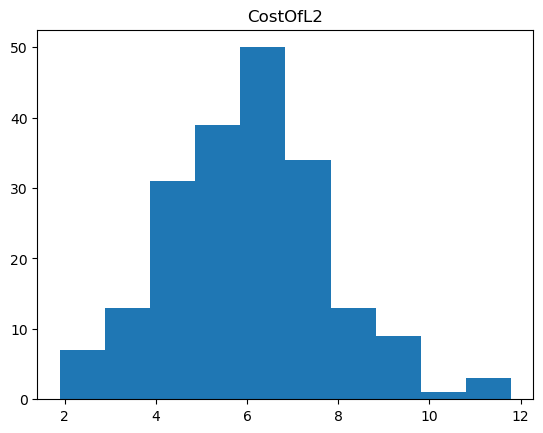

In [45]:
plt.hist(scores['CostOfL2'])
plt.title(label='CostOfL2')
plt.savefig('CostOfL2_distribution')
plt.show()

In [64]:
newCorr = scores.corr()
newCorr

,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance,newCostOfLiving,CostOfL2,CostOfL2,newNewCostOfLiving
Cost of Living,1.000000,-0.742662,-0.011178,-0.683704,-0.509653,-0.354130,-0.029397,0.015935,0.038026,-0.128988
Business Freedom,-0.742662,1.000000,-0.021388,0.681713,0.618213,0.371194,-0.040311,0.032415,-0.004939,0.046775
Safety,-0.011178,-0.021388,1.000000,0.108789,-0.216606,0.383798,-0.118989,-0.109745,0.048062,-0.008434
Education,-0.683704,0.681713,0.108789,1.000000,0.475641,0.258807,-0.079255,-0.017059,0.044384,0.070780
Economy,-0.509653,0.618213,-0.216606,0.475641,1.000000,-0.014757,0.017350,0.046829,0.019371,0.070292
Tolerance,-0.354130,0.371194,0.383798,0.258807,-0.014757,1.000000,-0.128619,0.096795,0.076314,-0.099864
newCostOfLiving,-0.029397,-0.040311,-0.118989,-0.079255,0.017350,-0.128619,1.000000,0.032750,0.029848,0.050552
CostOfL2,0.015935,0.032415,-0.109745,-0.017059,0.046829,0.096795,0.032750,1.000000,0.028687,-0.025862
CostOfL2,0.038026,-0.004939,0.048062,0.044384,0.019371,0.076314,0.029848,0.028687,1.000000,0.026384
newNewCostOfLiving,-0.128988,0.046775,-0.008434,0.070780,0.070292,-0.099864,0.050552,-0.025862,0.026384,1.000000


In [65]:
scores.describe()

,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance,newCostOfLiving,CostOfL2,CostOfL2,newNewCostOfLiving
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.962835,7.687105,6.748665,4.209138,5.293908,6.778008,6.183540,5.999299,6.003483,5.981265
std,1.863146,1.778135,1.776871,1.950519,1.408664,1.682179,1.859907,1.773967,1.752496,1.895600
min,1.000000,2.781000,1.343500,0.500000,1.275500,1.528000,-0.561297,-0.045424,1.896845,0.129045
25%,4.932250,6.206917,5.651875,3.624500,4.273125,5.782625,4.931403,4.827104,4.805523,4.796197
50%,5.641000,8.671000,7.089000,4.306500,5.438000,7.091000,6.293910,5.895507,6.008619,5.973228
75%,7.260000,8.888000,7.929500,5.302375,6.514500,8.000125,7.540344,7.198473,6.993951,7.164239
max,10.000000,10.000000,10.000000,9.711000,9.390000,9.738500,11.029481,10.963667,11.786869,13.497255


In [58]:
scores['newNewCostOfLiving'] = rng.normal(5.962835, 1.863146, 200)
scores

C:\Users\tanju\AppData\Local\Temp\ipykernel_7060\394047828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['newNewCostOfLiving'] = rng.normal(5.962835, 1.863146, 200)


,City,Country,Continent,Cost of Living,Business Freedom,Safety,Education,Economy,Tolerance,newCostOfLiving,CostOfL2,CostOfL2,newNewCostOfLiving
0,Aarhus,Denmark,Europe,4.015,9.940000,9.6165,5.3665,4.8865,9.7385,7.630265,7.357548,7.271249,7.152945
1,Adelaide,Australia,Oceania,4.692,9.399667,7.9260,5.1420,6.0695,7.8220,3.970862,7.154398,3.638126,8.984478
2,Albuquerque,New Mexico,North America,6.059,8.671000,1.3435,4.1520,6.5145,7.0285,6.148727,10.963667,6.866807,5.432187
3,Almaty,Kazakhstan,Asia,9.333,5.568000,7.3090,2.2830,5.2690,6.5395,8.333609,8.663957,11.786869,6.282063
4,Amsterdam,Netherlands,Europe,3.824,8.836667,8.5035,6.1800,5.0530,8.3680,3.563965,6.776166,6.508470,3.810889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,St. Louis,Missouri,North America,5.504,8.671000,3.8805,5.2715,6.5145,4.3760,6.543144,5.528263,6.111649,6.871340
230,Stockholm,Sweden,Europe,4.360,9.569000,6.8865,6.6675,5.6945,5.7195,4.648193,6.774233,4.542092,8.512264
231,Stuttgart,Germany,Europe,5.673,9.072333,8.2695,5.0505,5.3735,7.5335,7.317439,6.007508,5.213687,5.492736
232,Sydney,Australia,Oceania,4.128,9.399667,7.5710,6.7255,6.0695,7.0325,7.184477,5.478982,5.543582,4.533783


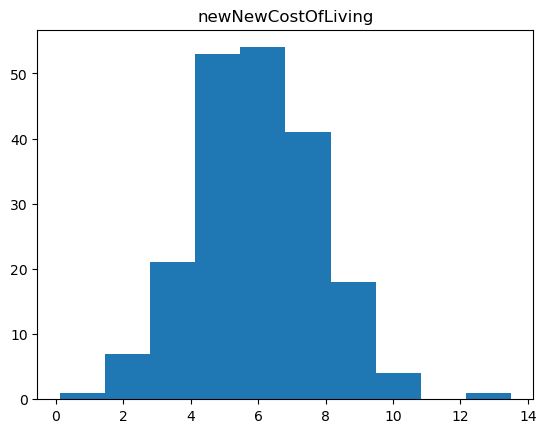

In [60]:
plt.hist(scores['newNewCostOfLiving'])
plt.title(label='newNewCostOfLiving')
plt.savefig('newNewCostOfLiving_distribution')
plt.show()

References:  
    [1]: Karaman, O. (n.d.). City Quality of Life Dataset., Version 1, Retreived November 24, 2022 from https://www.kaggle.com/datasets/orhankaramancode/city-quality-of-life-dataset  
    [2]: Teleport, (n.d). About us, Retreived November 24, 2022 from https://teleport.org/about-us/  
    

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html    
https://stackoverflow.com/questions/19482970/get-a-list-from-pandas-dataframe-column-headers  
https://www.geeksforgeeks.org/print-lists-in-python-4-different-ways/  
https://sparkbyexamples.com/pandas/pandas-drop-columns-examples/  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html  
https://www.youtube.com/watch?v=i4cI4y9cLzg  
https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/  